In [1]:
import fiona
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import *
%matplotlib inline
sns.set(color_codes=True)

In [2]:
with fiona.open("imnav_2017.shp", "r") as shapefile:
    features = [feature for feature in shapefile]

In [3]:
src = rasterio.open('/home/cparr/surfaces/depth_ddems/clpx/clpx_2017_2017_raw.tif')
src.meta

{'count': 1,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 16384,
 'nodata': nan,
 'transform': Affine(1.0, 0.0, 397068.0,
       0.0, -1.0, 7624870.0),
 'width': 20480}

In [4]:
pts_w_errors = features.copy()

In [5]:
errors = []
sfm = []
probe = []

for feature in features:
    sfm_depth = [val for val in src.sample([feature['geometry']['coordinates']])][0][0]
    probe_depth = feature['properties']['Depth'] / 100.0 # Probe Depths come in cm
    probe_sfm_diff = probe_depth - sfm_depth
    errors.append(probe_sfm_diff)
    sfm.append(sfm_depth)
    probe.append(probe_depth)
    
sfm = np.array(sfm)
probe = np.array(probe)
errors = np.array(errors)

err_desc = describe(errors)
err_desc
# names = ["Obs.", "min", "max", "mean", "stdev"]
# err_desc = [err_desc[0], err_desc[1][0],err_desc[1][1], err_desc[2],err_desc[3]]

# for i in range(5):
#     print ("%s: %2f" % (names[i], round(err_desc[i],3)))

DescribeResult(nobs=5979, minmax=(-0.61378642578124998, 1.2318134765625), mean=0.36217338635092616, variance=0.014954712846568789, skewness=-0.7175384195483713, kurtosis=5.97221059167388)

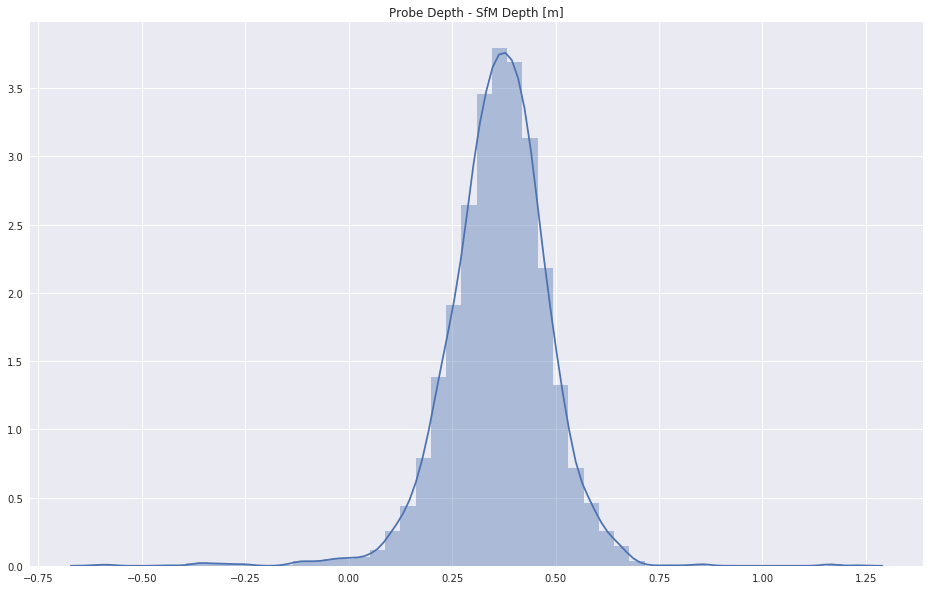

In [6]:
plt.figure(figsize=(16,10))
ax = sns.distplot(errors, hist=True)
ax.set_title('Probe Depth - SfM Depth [m]')

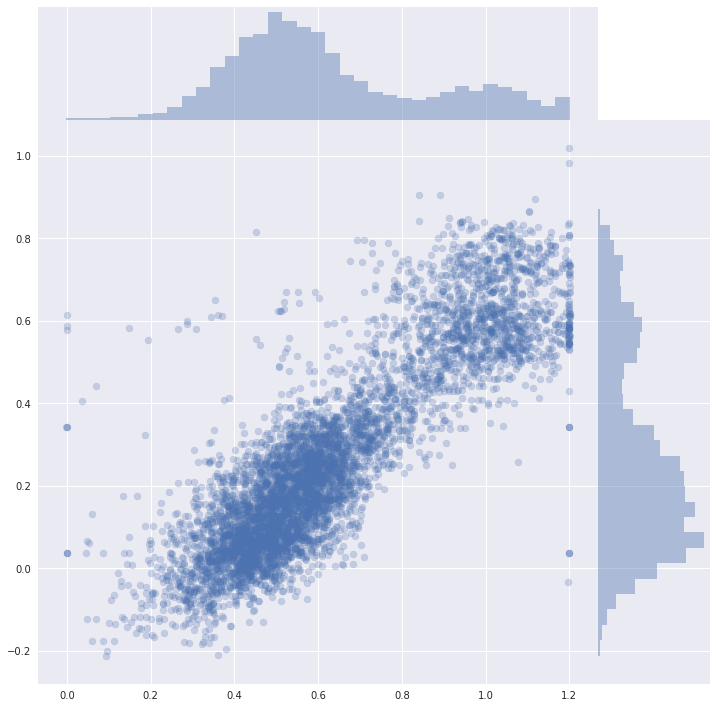

In [8]:
ax = sns.jointplot(x=probe, y=sfm, alpha=0.25, size=10, space=0, stat_func=None)

In [ ]:
# Two population of errors...sort of general errors...and the remnant snow error?